In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

# Is machine learning math a rocket science?! 

Any machine learning model consist off:
1. Model representation
2. Cost function (target function) 
3. optimization function

## Model representation: 

Assume the following:
1. We have a house size: $x$
2. a house price $y$
$$ x = \begin{bmatrix}
    1 & 2 & 3
\end{bmatrix}$$

$$ y = \begin{bmatrix}
    1 & 2 & 3
\end{bmatrix}$$



([<matplotlib.axis.YTick at 0x8445390>,
 <a list of 5 Text yticklabel objects>)

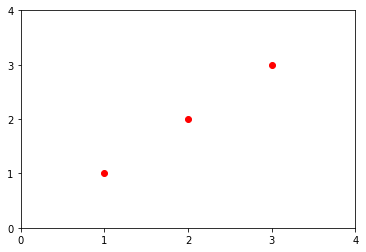

In [2]:
x = np.array([1,2,3])
y = np.array([1,2,3])
plt.plot(x,y,'ro')
plt.axis([0,4,0,4])
plt.xticks([0,1,2,3,4])
plt.yticks([0,1,2,3,4])

So what is a basic representation for this ??

Exactly !!
$$ 
y = some\ coofficient * x \\
y = \beta * x $$

and we can represent y as $f(x)$ so
$$ f(x) = \beta * x $$

# Cost function:


Why do we even need one?
because we need a formalized representation. Why?

something the computer can understand for what happening in our minds :D 

### let's invent our cost function:
$$ cost = f(x) - y \\
= \big(\ f(x) - y \ \big) ^ 2 \\
= \sum_{i = 0}^n \big(\ f(x_i) - y_i \ \big) ^ 2 \\
= \dfrac{1}{n} \sum_{i = 0}^n \big(\ f(x_i) - y_i \ \big) ^ 2 \\
= \dfrac{1}{2n} \sum_{i = 0}^n \big(\ f(x_i) - y_i \ \big) ^ 2
$$

so what is this? 
### Mean Square Error Cost Function


## Minimize the Cost:

Our model: $ f(x) = \beta + x $

Our cost function: $ = \dfrac{1}{2n} \sum_{i = 0}^n \big(\ f(x_i) - y_i \ \big) ^ 2 $

after subsstatution: $$ \dfrac{1}{2n} \sum_{i = 0}^n \big(\ (\beta * x_i) - y_i \ \big) ^ 2 $$

beta = np.arange(0,2.1,0.1)
def cost(y, y_hat):
    n = len(y)
    return (((y_hat - y)**2).sum()) / n

beta_applied = np.array([a*b for a,b in zip(beta,np.array([x,]*len(beta)))])
loss = [cost(y, y_hat) for y_hat in beta_applied]
plt.plot(beta,loss)
plt.xlabel(r'$\beta$')
plt.ylabel('Loss')

So again how to formalize that $\beta$ should be 1

how to search for the best $\beta$?

how to minmize the cost function using $\beta$?

$\underset{\beta}{\operatorname{argmin}} \dfrac{1}{2n} \sum_{i = 0}^n \big(\ (\beta * x_i) - y_i \ \big) ^ 2 $

## Graident (derivative)

In [4]:
display_gif("https://upload.wikimedia.org/wikipedia/commons/2/2d/Tangent_function_animation.gif")

what is derivative?

the $\textbf{slope}$ of the $\textbf{tangent line}$ to the graph of the function

What is $\textbf{tangent line}$? 

is the best linear approximation of the function near the input value. 

What is $\textbf{slope}$? 

1. descripes the direction 
    1. if it is increasing then the slope is positive
    2. if it is decreasing then the slope is negative
2. descripes the steepness 

## What is Graident descent? 
Simplely it is updating the $\beta$ or $\textbf{Model Paramaters}$ values in the direction of the global minima using dervitatives (graident) 


$$\beta_{new} = \beta_{old}\ \textbf{-}\ \eta \dfrac{df}{d\beta}$$

$$ \dfrac{df}{d\beta} = \dfrac{1}{N} \sum_{i = 0}^n x_i (\beta x_i - y_i) $$



In [5]:
def gradient_step(x, y, beta, learning_rate):
    N = len(x)
    diff = 1/N * np.sum( x * ((beta * x) - y))
    return beta - (learning_rate * diff)

[2, 1.9533333333333334, 1.9088444444444446, 1.8664317037037039, 1.825998224197531, 1.7874516404016463, 1.7507038971829028, 1.7156710486477007, 1.6822730663774748, 1.6504336566131925, 1.6200800859712436, 1.5911430152925856, 1.5635563412455984, 1.5372570453208039, 1.5121850498724998, 1.4882830808784497]


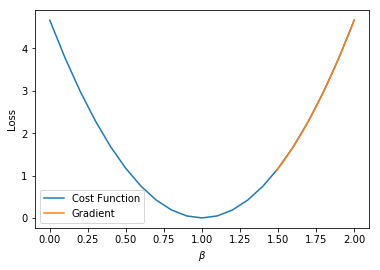

In [6]:
eta = 0.01

betas = [2]
for i in range(15):
    betas.append(gradient_step(x, y, betas[i], eta)) 
    

beta_p_applied = np.array([a*b for a,b in zip(betas,np.array([x,]*len(beta)))])
loss_p = [cost(y, y_hat) for y_hat in beta_p_applied]
    
print(betas)
plt.plot(beta,loss)
plt.plot(betas, loss_p,'-')
plt.xlabel(r'$\beta$')
plt.ylabel('Loss')
plt.legend(['Cost Function','Gradient'])